In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, f1_score, fbeta_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

In [10]:
df = pd.read_csv(r'C:\Users\bradl\OneDrive\Documents\GitHub\MachineLearning_Final_Practice\Data\waterpump.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45009 entries, 0 to 45008
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     45009 non-null  int64  
 1   amount_tsh             45009 non-null  float64
 2   date_recorded          45009 non-null  object 
 3   funder                 42233 non-null  object 
 4   gps_height             45009 non-null  int64  
 5   installer              42227 non-null  object 
 6   longitude              45009 non-null  float64
 7   latitude               45009 non-null  float64
 8   wpt_name               45008 non-null  object 
 9   num_private            45009 non-null  int64  
 10  basin                  45009 non-null  object 
 11  subvillage             44722 non-null  object 
 12  region                 45009 non-null  object 
 13  region_code            45009 non-null  int64  
 14  district_code          45009 non-null  int64  
 15  lg

In [13]:
missing = df.isnull().sum()/len(df) * 100
missing.sort_values(ascending=False)

id                       0.0
scheme_name              0.0
construction_year        0.0
extraction_type          0.0
extraction_type_group    0.0
extraction_type_class    0.0
management               0.0
management_group         0.0
payment                  0.0
payment_type             0.0
water_quality            0.0
quality_group            0.0
quantity                 0.0
quantity_group           0.0
source                   0.0
source_type              0.0
source_class             0.0
waterpoint_type          0.0
waterpoint_type_group    0.0
permit                   0.0
scheme_management        0.0
amount_tsh               0.0
recorded_by              0.0
date_recorded            0.0
funder                   0.0
gps_height               0.0
installer                0.0
longitude                0.0
latitude                 0.0
wpt_name                 0.0
num_private              0.0
basin                    0.0
subvillage               0.0
region                   0.0
region_code   

In [12]:
#filling missing values with the mean

df['scheme_name'] = df['scheme_name'].fillna('None')
df['scheme_management'] = df['scheme_management'].fillna('None')
df['installer'] = df['installer'].fillna('None')
df['funder'] = df['funder'].fillna('None')
df['public_meeting'] = df['public_meeting'].fillna('None')
df['permit'] = df['permit'].fillna('None')
df['subvillage'] = df['subvillage'].fillna('None')
df['wpt_name'] = df['ward'].fillna('None')

In [19]:
#begin label encoding categorical variables


le = LabelEncoder()
df['funder'] = le.fit_transform(df['funder'])
df['funder'] = le.fit_transform(df['funder'])
df['public_meeting'] = df['public_meeting'].astype(str)
df['public_meeting'] = le.fit_transform(df['public_meeting'])
df['management'] = le.fit_transform(df['management'])
df['management_group'] = le.fit_transform(df['management_group'])
df['payment'] = le.fit_transform(df['payment'])
df['payment_type'] = le.fit_transform(df['payment_type'])
df['water_quality'] = le.fit_transform(df['water_quality'])
df['quality_group'] = le.fit_transform(df['quality_group'])
df['quantity'] = le.fit_transform(df['quantity'])
df['quantity_group'] = le.fit_transform(df['quantity_group'])
df['source'] = le.fit_transform(df['source'])
df['source_type'] = le.fit_transform(df['source_type'])
df['source_class'] = le.fit_transform(df['source_class'])
df['waterpoint_type'] = le.fit_transform(df['waterpoint_type'])
df['waterpoint_type_group'] = le.fit_transform(df['waterpoint_type_group'])


In [24]:
#adjust target feature to binary and combine functional and functional needs repair

df['status_group'] = df['status_group'].replace({'functional': 1, 'non functional': 0, 'functional needs repair': 1})

df['status_group'].value_counts()


status_group
1    27650
0    17359
Name: count, dtype: int64

In [33]:
#create new_df that omits all 'objects'

new_df = df.select_dtypes(exclude=['object'])

In [52]:
#splitting data into training and testing sets

X = new_df.drop('status_group', axis=1)
y = new_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

In [55]:
#decision tree classifier model

clf_params = {'max_depth': [4,5,6,7],
              'min_samples_leaf': [0.01, 0.025, 0.04]}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid=clf_params, cv=5, scoring='f1', n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

#slight overfitting - manageable

{'max_depth': 5, 'min_samples_leaf': 0.01}
0.8344631532910562
0.8337169616636241


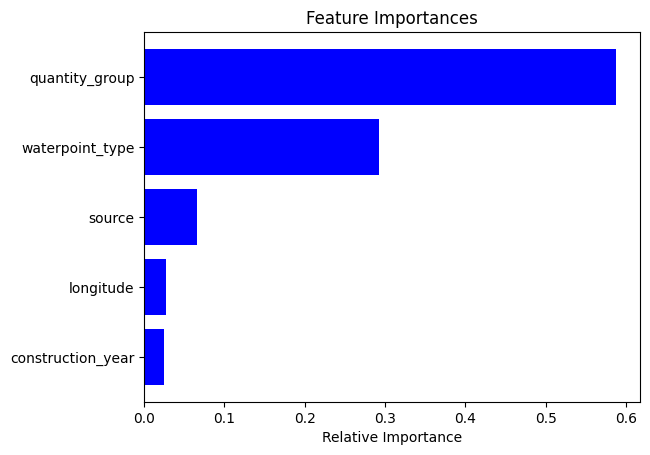

In [56]:
#predicting on test set

y_pred = clf.predict(X_test)

#feature importance

importances = clf.best_estimator_.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[-10:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.48      0.61      3472
           1       0.74      0.95      0.83      5530

    accuracy                           0.77      9002
   macro avg       0.80      0.71      0.72      9002
weighted avg       0.79      0.77      0.75      9002



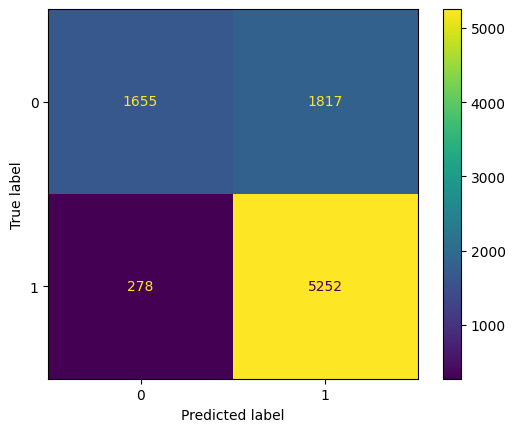

In [59]:
#confusion matrix

confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

#classification report

print(classification_report(y_test, y_pred))


In [64]:
#store top features to use in random forest model

top_features = [features[i] for i in indices]

#random forest model dataframe with target feature and top features

top_df = new_df[top_features]
top_df = pd.concat([top_df, new_df['status_group']], axis=1)

(45009, 6)

In [72]:
#random forest classifier model

new_X = top_df.drop('status_group', axis=1)
new_y = top_df['status_group']

rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=24, stratify=new_y)

In [73]:
rf_params = {'max_depth': [4,6,8],
             'min_samples_leaf': [0.01, 0.25],
             'n_estimators': [10, 50, 60]}

rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5, scoring='f1', n_jobs=-1)
rf.fit(rf_X_train, rf_y_train)

print(rf.best_params_)
print(rf.score(rf_X_train, rf_y_train))
print(rf.score(rf_X_test, rf_y_test))

{'max_depth': 8, 'min_samples_leaf': 0.01, 'n_estimators': 50}
0.8375698074209512
0.8359468279869458


              precision    recall  f1-score   support

           0       0.86      0.49      0.62      3472
           1       0.75      0.95      0.84      5530

    accuracy                           0.77      9002
   macro avg       0.80      0.72      0.73      9002
weighted avg       0.79      0.77      0.75      9002



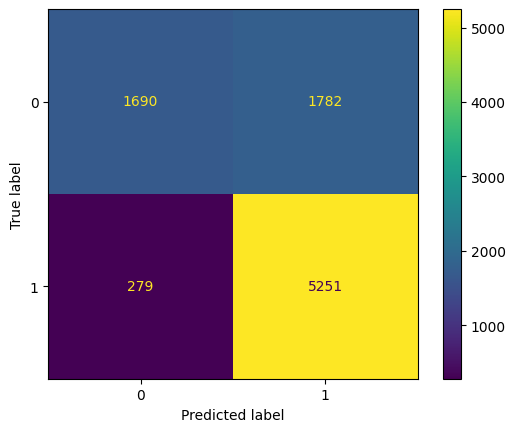

In [75]:
y_pred_rf = rf.predict(rf_X_test)

#confusion matrix

confusion_matrix(rf_y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix(rf_y_test, y_pred_rf)).plot()

#classification report

print(classification_report(rf_y_test, y_pred_rf))